<a href="https://colab.research.google.com/github/SrinathMLOps/ml_model_demo/blob/main/KNN_Sept_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.45
Precision: 0.60
Recall: 0.43
F1-Score: 0.50


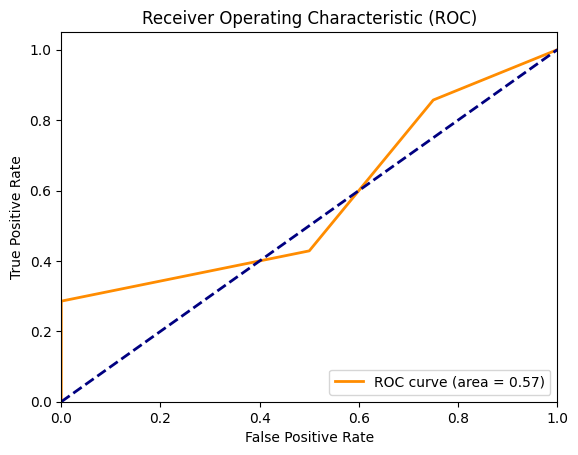

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Step 1: Generate synthetic dataset (50 rows, 20 features, binary classification)
np.random.seed(42)
X = np.random.rand(50, 20)
y = np.random.randint(2, size=50)  # Binary classes (0 or 1)

# Step 2: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Define the KNN model
knn = KNeighborsClassifier()

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5],  # K values
    'weights': ['uniform', 'distance'],  # Weighting schemes
    'metric': ['euclidean', 'manhattan'],  # Distance metrics
}

# Step 6: Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model after grid search
best_knn = grid_search.best_estimator_

# Step 7: Make predictions on the test set
y_pred = best_knn.predict(X_test)
y_prob = best_knn.predict_proba(X_test)[:, 1]  # For ROC curve, we need probability estimates

# Step 8: Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Step 9: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:


# Step 1: Generate synthetic dataset (50 rows, 20 features, binary classification)
np.random.seed(42)
X = np.random.rand(50, 20)
y = np.random.randint(2, size=50)  # Binary classes (0 or 1)



**Explanation of Code:**
**Data Generation:**
A synthetic dataset of 50 samples and 20 features is created, with a binary target variable (0 or 1).

**SMOTE:**
The SMOTE technique is applied to oversample the minority class, making the dataset balanced.

**Data Splitting and Standardization:**
The balanced data is split into training (80%) and test (20%) sets. The features are standardized using StandardScaler to make sure the distance metrics used in KNN are not skewed by features of different scales.

**KNN and GridSearch:**
GridSearchCV is used to tune the hyperparameters (n_neighbors, weights, and metric). The best hyperparameters are chosen based on accuracy, and the model is trained using cross-validation.

**Evaluation Metrics:**
After predicting on the test set, the following metrics are calculated:
Accuracy: The proportion of correct predictions.
Precision: How many of the predicted positives were actually positive.
Recall: How many of the actual positives were correctly predicted.
F1-Score: The harmonic mean of precision and recall.

**ROC Curve:**
The ROC Curve is plotted, showing the trade-off between the True Positive Rate (Recall) and False Positive Rate for various classification thresholds. The AUC (Area Under the Curve) gives a summary of model performance, with values closer to 1 indicating better performance.

**Output:**
Best Parameters: This will print the best KNN parameters found by GridSearchCV.
Metrics: Accuracy, Precision, Recall, and F1-Score will be displayed in the console.
**ROC Curve:** A plot showing the ROC curve with the AUC value.
**Conclusion:**

Handling class imbalance with SMOTE.
Hyperparameter tuning with GridSearchCV.
Evaluation metrics (accuracy, precision, recall, F1-score).
ROC curve to visualize the model's performance.